In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import MaxPool2D
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [2]:
def load_data(category, label, sample_size=None):
    x = np.load("input" + "/" + category + ".npy")
    y = np.array([label] * x.shape[0])
    ## Trimming the category to sample size
    if(sample_size != None):
        x = x[:sample_size,:]
        y = y[:sample_size]
    print("Category: {}, Label: {}, X-Shape: {} & Y-Shape: {}".format(category, label, x.shape, y.shape))
    return (x,y)

In [3]:
def plot_samples(input_array, rows=1, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

In [4]:
def resahape_data(x, y):
    x = x.reshape(x.shape[0], 28, 28, 1).astype('float32')
    # one hot encode outputs
    y = np_utils.to_categorical(y)
    print("After reshape, x: {}, y:{}".format(x.shape, y.shape))
    return(x, y)

In [5]:
# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
def get_train_test(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x/255., y, test_size=0.5, random_state=0)
    return(x_train, x_test, y_train, y_test)

Category: fish, Label: 0, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: fork, Label: 1, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: hotdog, Label: 2, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: flamingo, Label: 3, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: airplane, Label: 4, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: alarmclock, Label: 5, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: baseballbat, Label: 6, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: bicycle, Label: 7, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: dolphin, Label: 8, X-Shape: (10000, 784) & Y-Shape: (10000,)
Category: elephant, Label: 9, X-Shape: (10000, 784) & Y-Shape: (10000,)
Shape, x: (100000, 784), y:(100000,)


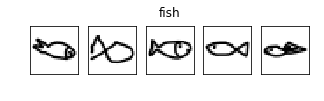

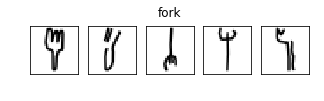

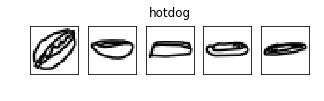

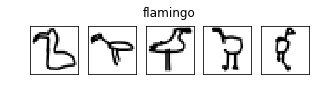

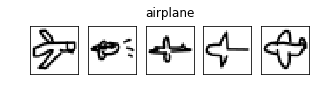

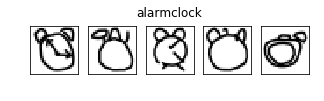

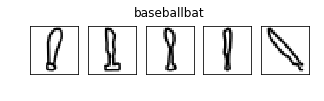

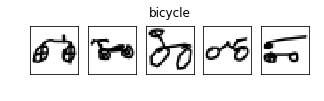

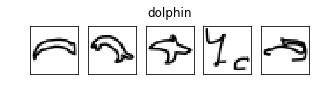

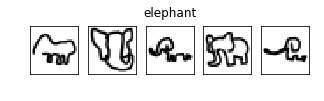

In [6]:
categories = ["fish", "fork", "hotdog", "flamingo", "airplane", "alarmclock", "baseballbat", "bicycle", "dolphin", "elephant"]
x = None
y = None
for i in range(len(categories)):
    if(i == 0):
        x_temp, y_temp = load_data(categories[i], i, 10000)
        plot_samples(x_temp, rows=1, cols=5, title=categories[i])
        x = x_temp
        y = y_temp
    else:
        x_temp, y_temp = load_data(categories[i], i, 10000)
        plot_samples(x_temp, rows=1, cols=5, title=categories[i])
        x = np.concatenate((x, x_temp), axis=0).astype('float32')
        y = np.concatenate((y, y_temp), axis=0).astype('float32')
print("Shape, x: {}, y:{}".format(x.shape, y.shape))

In [8]:
x, y = resahape_data(x, y)
x_train, x_test, y_train, y_test = get_train_test(x, y)

After reshape, x: (100000, 28, 28, 1), y:(100000, 10)


In [9]:
NUM_CLASSES = len(categories)
INPUT_SHAPE = (28, 28,1)

In [10]:
def model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape = INPUT_SHAPE))
    model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (2,2), activation='relu'))
    
    model.add(Dropout(0.6))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(units=NUM_CLASSES, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                     
    return model

In [35]:
def train(model, x_train, y_train, x_test, y_test):
    model.summary()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)
    model.save('../model_quickdraw.h5')
    return (model, history)

In [31]:
def plot_accuracy(history):
    # Plotting the history of accuracy 
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()

In [32]:
def plot_loss(history):
    # Summarizing the history of loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()

In [36]:
model_1 = model()
model_1, history_1 = train(model_1, x_train, y_train, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
__________

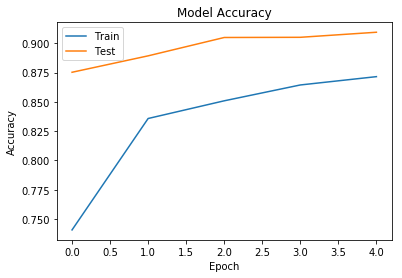

In [37]:
plot_accuracy(history_1)

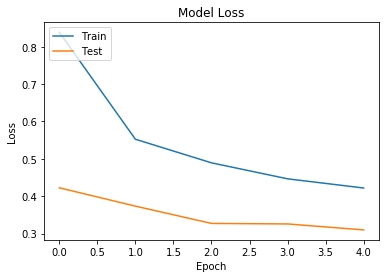

In [38]:
plot_loss(history_1)

In [39]:
y_predicted = model_1.predict_classes(x_test)
y_predicted = np_utils.to_categorical(y_predicted)
accuracy_score(y_test, y_predicted)

0.90942000000000001